In [6]:
import json
import tweepy
import csv
import codecs

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

import time
import os

import pandas as pd
from pandas.io.json import json_normalize as jn

import re,string

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import matplotlib.pyplot as plt

twitter_cred = dict()

twitter_cred['CONSUMER_KEY'] = '17XHiftb4Iu5hVAIh4NacWj9S'
twitter_cred['CONSUMER_SECRET'] = '8xAXhFsfnkiFjSFO5THqRO5J8x8lKSzC9J2GNPUSY7ZPb5z6Qv'
twitter_cred['ACCESS_KEY'] = '1392379572-FInzXaziEqyNCGc8jqtU9LwnFFlHYRpjoihZpiX'
twitter_cred['ACCESS_SECRET'] = 'JBDveSiUU6aXpwx8QkxYhXloDr9DyHn7ocqrqgWqwqctw'

In [7]:
with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)
    

In [8]:
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

# Create the api endpoint

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [9]:

start_time = time.time()
class MyListener(StreamListener):
    def __init__(self, start_time, time_limit=60):
 
        self.time = start_time
        self.limit = time_limit
        self.tweet_data = []
        self.saveFile = open('raw_tweets.json', 'a', encoding='utf-8')
    
    def on_data(self, data):
        if (time.time() - self.time) < self.limit:
            try:
                self.tweet_data.append(data)
                saveFile = open('raw_tweets.json', 'w', encoding='utf-8')
                saveFile.write(u'[\n')
                saveFile.write(','.join(self.tweet_data))
                saveFile.write(u'\n]')
                saveFile.close()
                #exit()
                return True
            except BaseException as e:
                print("Error on_data: %s" % str(e))
                time.sleep(5)
                return True
        else:
            self.saveFile.close()
            return False 
                
 
        
    
    def on_error(self, status):
        print(status)
        return True


#if __name__ == '__main__':
    #MyListener = MyListener()
    #auth = OAuthHandler(consumer_key, consumer_secret)
    #auth.set_access_token(access_key, access_secret)
    #stream = Stream(auth,MyListener )
    #stream.filter(track=['#ML', '#Datascience', '#Arima'])



    
#This block of code opens an output file, writes the opening square bracket, writes the JSON data as text separated by commas, then inserts a closing square bracket, and closes the document. This is the standard JSON format with each Twitter object acting as an element in a JavaScript array. If you bring this into R or Python built-in parser and the json library can properly handle it.



In [10]:
#MyListener = MyListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
stream = Stream(auth,MyListener(start_time, time_limit=500) )
stream.filter(track=['#ML', '#Datascience', '#Arima'])


In [24]:
# with codecs.open('raw_tweets.json', 'r', 'utf-8') as f:
#     tweets = json.load(f, encoding='utf-8')
    

# list_tweets = [list(elem.values()) for elem in tweets]
# list_columns = list(tweets[0].keys())
# df = pd.io.json.json_normalize(tweets)
# df = pd.DataFrame(list_tweets, columns=list_columns)

In [11]:
# data=open('raw_tweets.json', 'r', encoding='utf-8')
# df = pandas.io.json.json_normalize(data)
# df.columns = df.columns.map(lambda x: x.split(".")[-1])
# df.head()

with open('raw_tweets.json', 'r', encoding="utf-8") as json_file:
    json_work = json.load(json_file)
    
df = pd.io.json.json_normalize(json_work)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Columns: 354 entries, contributors to user.verified
dtypes: bool(13), float64(78), int64(11), object(252)
memory usage: 230.3+ KB


In [12]:
df_clean=df['text']

In [13]:
df_cleans=pd.DataFrame({'text':df_clean})

In [14]:
def remove_RT(x):
    if x=="RT ":
        return " "
        #return str(x.replace('b\'RT ',''))

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    #cleanString   = re.sub('\W+','', string )
    for link in links:
        text = text.replace(link[0], ', ')    
        #text = text.replace(cleanString, '')
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

In [15]:
df_cleans['TextNoMentions']=df_cleans['text'].str.replace('RT', ' ')

In [16]:
df_cleans['TextNoMentions']=df_cleans['TextNoMentions'].str.replace('#', '', case=False)

In [17]:
#df_cleans['TextNoLinks']=df_cleans['text'].apply(strip_links)
df_cleans['TextNoMentions']=df_cleans['TextNoMentions'].str.replace('http\S+|www.\S+', '', case=False)

In [18]:
#df_cleans['TextNoEntities']=df_cleans['TextNoLinks'].apply(strip_all_entities)
df_cleans['TextNoMentions']=df_cleans['TextNoMentions'].apply(strip_all_entities)

In [19]:
df_cleans['TextNoMentions']=df_cleans['TextNoMentions'].apply(removeNonAscii)

In [20]:
a=df_cleans['TextNoMentions'].unique()

In [21]:
a=a.tolist()

In [22]:
df_cleaner=pd.DataFrame({'text':a})

In [23]:
df_cleaner.head()

,text
0,Using AI In what capacity I m assuming chatbot...
1,DataScience could benefit from applying proven...
2,S clicar e ver se vale a pena Segue gt ditatog...
3,Piccard Top 10 Companies and Countries focused...
4,kdnuggets via NodeXL vanloon


In [24]:
df_cleaner['text']=df_cleaner['text'].str.lower()

In [25]:
df_cleaner.head()

,text
0,using ai in what capacity i m assuming chatbot...
1,datascience could benefit from applying proven...
2,s clicar e ver se vale a pena segue gt ditatog...
3,piccard top 10 companies and countries focused...
4,kdnuggets via nodexl vanloon


In [26]:
# Lets check the avg number of words in text written by each author in a histogram 
def word_count(row):
    """function to calculate the count of words in a given text """
    text = row['text']
    text_splited = text.split(' ')
    word_count = text_splited.__len__()
    return word_count

df_cleaner['word_count'] = ''
df_cleaner['word_count'] = df_cleaner.apply(lambda row: word_count(row), axis =1)

(-0.5, 399.5, 199.5, -0.5)

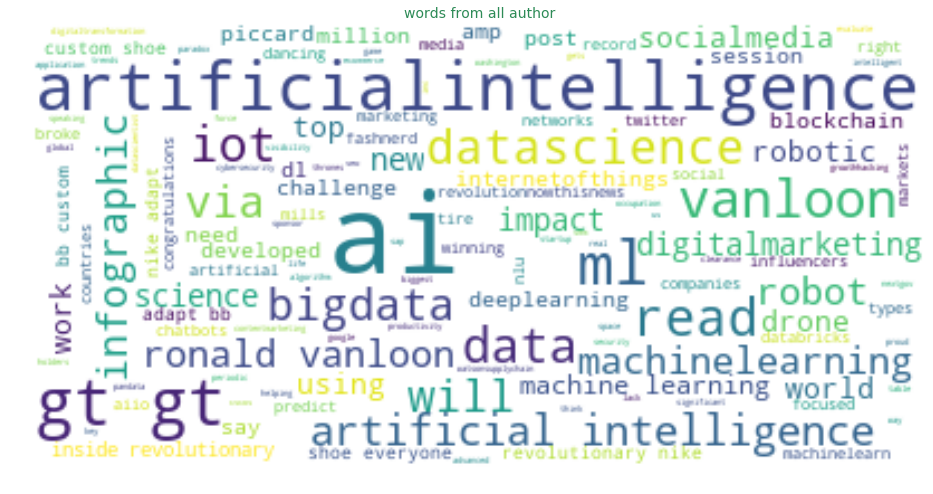

In [27]:
#mws = df_cleaner["text"].values

wc = WordCloud(background_color="white", max_words=5000, 
               stopwords=STOPWORDS, max_font_size= 50)
# generate word cloud
wc.generate(" ".join(df_cleaner.text.values))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.title("words from all author", fontsize=14,color='seagreen')
plt.axis("off")

In [36]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils


Creating character/word mappings

In [37]:
import string
 
# turn a doc into clean tokens
def clean_doc(row):
    # replace '--' with a space ' '
    text = row['text']
    text = text.replace('--', ' ')
    # split into tokens by white space
    tokens = text.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

In [38]:
df_cleaner['token'] = df_cleaner.apply(lambda row: clean_doc(row), axis =1)
#loaded document as an argument and returns an array of clean tokens.

In [39]:
df_cleaner.head()

,text,word_count,token
0,using ai in what capacity i m assuming chatbot...,20,"[using, ai, in, what, capacity, i, m, assuming..."
1,datascience could benefit from applying proven...,15,"[datascience, could, benefit, from, applying, ..."
2,s clicar e ver se vale a pena segue gt ditatog...,18,"[s, clicar, e, ver, se, vale, a, pena, segue, ..."
3,piccard top 10 companies and countries focused...,18,"[piccard, top, companies, and, countries, focu..."
4,kdnuggets via nodexl vanloon,4,"[kdnuggets, via, nodexl, vanloon]"


In [40]:
#creating a set of all words in the text columns
def list_creation(list_trial):
    list_trial=list_trial.tolist()
    result_trial = set(x for l in list_trial for x in l)
    #print (result_set)
    return (result_trial)   

In [41]:
df_tokens=list_creation(df_cleaner['token'])
print('Total Tokens: %d' % len(df_tokens))
print('Unique Tokens: %d' % len(set(df_tokens)))

Total Tokens: 465
Unique Tokens: 465


general idea , creating sequences

organize the long list of tokens into sequences of n input words and 1 output word, That is, sequences of n+1 words.
We can do this by iterating over the list of tokens from token n+1 onwards and taking the prior n tokens as a sequence, then repeating this process to the end of the list of tokens.



In [42]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
df_tokens=list(df_tokens)
for i in range(length, len(df_tokens)):
    # select sequence of tokens
    seq = df_tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
print('Total Sequences: %d' % len(sequences))
#use sequences for modeling

Total Sequences: 414


he model we will train is a neural language model. It has a few unique characteristics:

It uses a distributed representation for words so that different words with similar meanings will have a similar representation.
It learns the representation at the same time as learning the model.
It learns to predict the probability for the next word using the context of the last 100 words.
Specifically, we will use an Embedding Layer to learn the representation of words, and a Long Short-Term Memory (LSTM) recurrent neural network to learn to predict words based on their context.

In [43]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [44]:
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

Encode Sequences
The word embedding layer expects input sequences to be comprised of integers.

We can map each word in our vocabulary to a unique integer and encode our input sequences. Later, when we make predictions, we can convert the prediction to numbers and look up their associated words in the same mapping.

To do this encoding, we will use the Tokenizer class in the Keras API.

First, the Tokenizer must be trained on the entire training dataset, which means it finds all of the unique words in the data and assigns each a unique integer.

We can then use the fit Tokenizer to encode all of the training sequences, converting each sequence from a list of words to a list of integers.

In [45]:
def load_doc(filename):
# open the file as read only
    file = open(filename, 'r')
# read all text
    text = file.read()
# close the file
    file.close()
    return text
 
# load
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')


In [46]:
from keras.preprocessing.text import Tokenizer
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

We can access the mapping of words to integers as a dictionary attribute called word_index on the Tokenizer object.

In [47]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1


In [48]:
import numpy as np
sequences = np.asarray(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
seq_length = X.shape[1]

In [49]:
y = np_utils.to_categorical(y, num_classes=vocab_size)

In [50]:
# define model
from keras.layers import Dense, Dropout
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            23250     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 465)               46965     
Total params: 221,115
Trainable params: 221,115
Non-trainable params: 0
_________________________________________________________________
None


In [51]:

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
414/414 [==============================] - 1s 3ms/step - loss: 6.1429 - acc: 0.0000e+00
Epoch 2/100
414/414 [==============================] - 1s 2ms/step - loss: 6.1409 - acc: 0.0024
Epoch 3/100
414/414 [==============================] - 1s 2ms/step - loss: 6.1393 - acc: 0.0024
Epoch 4/100
414/414 [==============================] - 1s 2ms/step - loss: 6.1368 - acc: 0.0048
Epoch 5/100
414/414 [==============================] - 1s 2ms/step - loss: 6.1322 - acc: 0.0048
Epoch 6/100
414/414 [==============================] - 1s 2ms/step - loss: 6.1206 - acc: 0.0048
Epoch 7/100
414/414 [==============================] - 1s 2ms/step - loss: 6.0885 - acc: 0.0024
Epoch 8/100
414/414 [==============================] - 1s 2ms/step - loss: 6.0340 - acc: 0.0048
Epoch 9/100
414/414 [==============================] - 1s 2ms/step - loss: 5.9705 - acc: 0.0024
Epoch 10/100
414/414 [==============================] - 1s 2ms/step - loss: 5.8812 - acc: 0.0072
Epoch 11/100
414/414 [=============

414/414 [==============================] - 1s 2ms/step - loss: 1.8195 - acc: 0.3430
Epoch 86/100
414/414 [==============================] - 1s 2ms/step - loss: 1.8057 - acc: 0.3237
Epoch 87/100
414/414 [==============================] - 1s 2ms/step - loss: 1.7689 - acc: 0.3599
Epoch 88/100
414/414 [==============================] - 1s 2ms/step - loss: 1.7668 - acc: 0.3696
Epoch 89/100
414/414 [==============================] - 1s 2ms/step - loss: 1.7800 - acc: 0.3454
Epoch 90/100
414/414 [==============================] - 1s 2ms/step - loss: 1.7761 - acc: 0.3551
Epoch 91/100
414/414 [==============================] - 1s 2ms/step - loss: 1.7559 - acc: 0.3478
Epoch 92/100
414/414 [==============================] - 1s 2ms/step - loss: 1.7498 - acc: 0.3551
Epoch 93/100
414/414 [==============================] - 1s 2ms/step - loss: 1.7478 - acc: 0.3333
Epoch 94/100
414/414 [==============================] - 1s 2ms/step - loss: 1.7232 - acc: 0.3720
Epoch 95/100
414/414 [=====================

Sequence Inputs and Output

In [55]:
# save the model to file
from json import dumps, loads
model.save('model.h5')
# save the tokenizer
with open('tokenizer.pkl', 'wb'):
    dumps(tokenizer)


TypeError: Object of type 'Tokenizer' is not JSON serializable

In [149]:
from array import array
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

TypeError: array() argument 1 must be a unicode character, not list

In [59]:
characters = sorted(list(set(df_cleaner['text'])))
n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}
#All unique characters are first stored in characters and are then enumerated.
#However, when compared with each other, a word-based model shows much higher accuracy as compared to a 
#character-based model. This is because the latter model requires a much larger network to learn 
#long-term dependencies as it not only has to remember the sequences of words, 
#but also has to learn to predict a grammatically correct word. However, in case of a word-based model, 
#the latter has already been taken care of.

In [255]:
df_cleans.head()
df_cleans.to_csv("new.csv", index=False)

In [ ]:
#helps in reading the file
with open('mytweets.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dict
    print(json.dumps(tweet, indent=4)) # pretty-print


In [ ]:
from operator import itemgetter        
import csv
import json

header = ['text', 'username', 'created_at']
required_cols = itemgetter(*header)

with open('python.json') as f_input, open('output.csv', 'wb') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerow(header)

    for row in f_input:
        if row.strip():
            csv_output.writerow(required_cols(json.loads(row)))


In [ ]:
def out_tweets(tweets_scrapped):
    
    outtweets = [[tweet.id_str, tweet.created_at,tweet.text.encode('utf-8').decode("utf-8"),tweet.user.name,tweet.user.screen_name,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.favorite_count] for tweet in tweets_scrapped]
    return outtweets

In [ ]:
def csv_tweets(outtweets,hashtag):
    tweet_csv_name=' tweets with hashtag #' + hashtag+'.csv'
    with open(tweet_csv_name, 'w', encoding='utf8') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'created_at', 'text','user','screen_name','friends_count','followers_count','retweet_count','favorite_count'])
    
        writer.writerows(outtweets)